# World Geographic Statistics Visualization

An interactive exploration of Earth's geographic features, climate extremes, and natural phenomena using comprehensive data from The World Factbook (2024).

In [7]:
!pip install pandas matplotlib seaborn numpy

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set dark theme
plt.style.use('dark_background')
colors = {
    'teal': '#4A9D9A',
    'yellow': '#FFD700',
    'red': '#FF4500',
    'green': '#90EE90',
    'purple': '#9370DB',
    'orange': '#FFA500',
    'bg': '#1E1E1E'
}

## Earth's Surface Composition
**Data Source:** World Factbook 2024  
**Current as of:** January 2024

The Earth's surface is predominantly water (70.9%), with land comprising only 29.1%. The water portion forms the World Ocean, divided into five major basins.

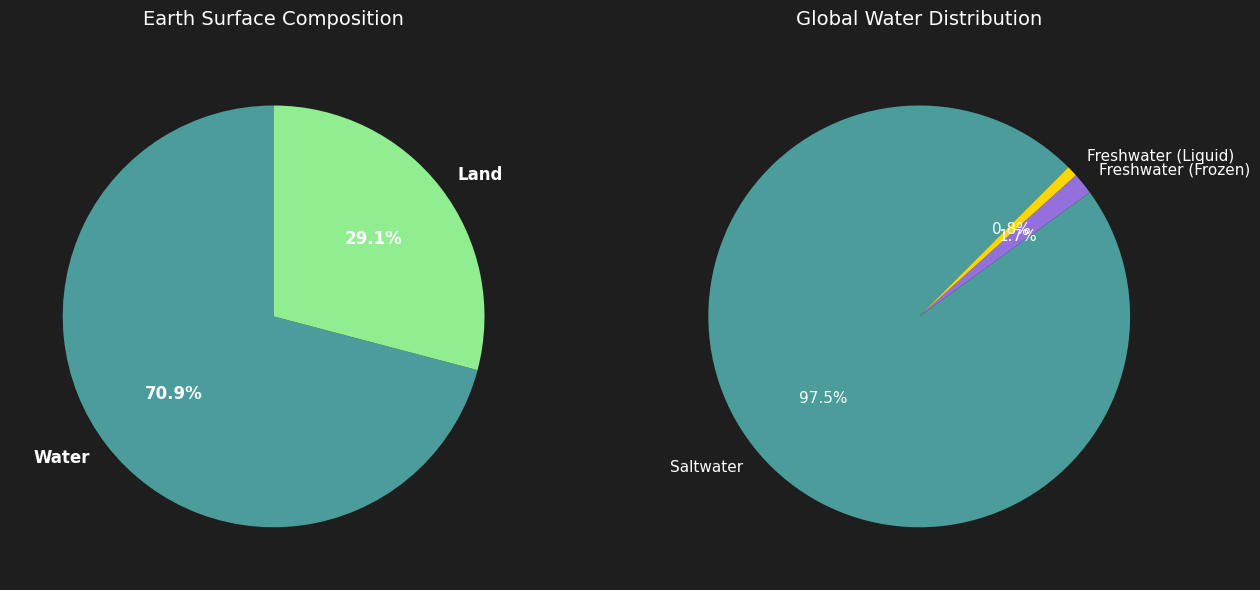

In [15]:
# Earth surface composition data
surface_data = pd.DataFrame({
    'Type': ['Water', 'Land'],
    'Area_sq_km': [361899999, 148940000],
    'Percentage': [70.9, 29.1]
})

water_types = pd.DataFrame({
    'Water_Type': ['Saltwater', 'Freshwater (Frozen)', 'Freshwater (Liquid)'],
    'Percentage': [97.5, 1.67, 0.83]
})

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor=colors['bg'])

# Surface composition pie chart
wedges, texts, autotexts = ax1.pie(surface_data['Percentage'], 
                                    labels=surface_data['Type'],
                                    colors=[colors['teal'], colors['green']],
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    textprops={'fontsize': 12, 'weight': 'bold'})
ax1.set_title('Earth Surface Composition', fontsize=14, pad=20, color='white')

# Water types pie chart
wedges2, texts2, autotexts2 = ax2.pie(water_types['Percentage'],
                                       labels=water_types['Water_Type'],
                                       colors=[colors['teal'], colors['purple'], colors['yellow']],
                                       autopct='%1.1f%%',
                                       startangle=45,
                                       textprops={'fontsize': 11})
ax2.set_title('Global Water Distribution', fontsize=14, pad=20, color='white')

plt.tight_layout()
plt.show()

## Largest Geographic Features
**Data Source:** World Factbook Rankings 2024  
**Current as of:** January 2024

Comparison of the world's largest oceans, countries, and landmasses by total area.

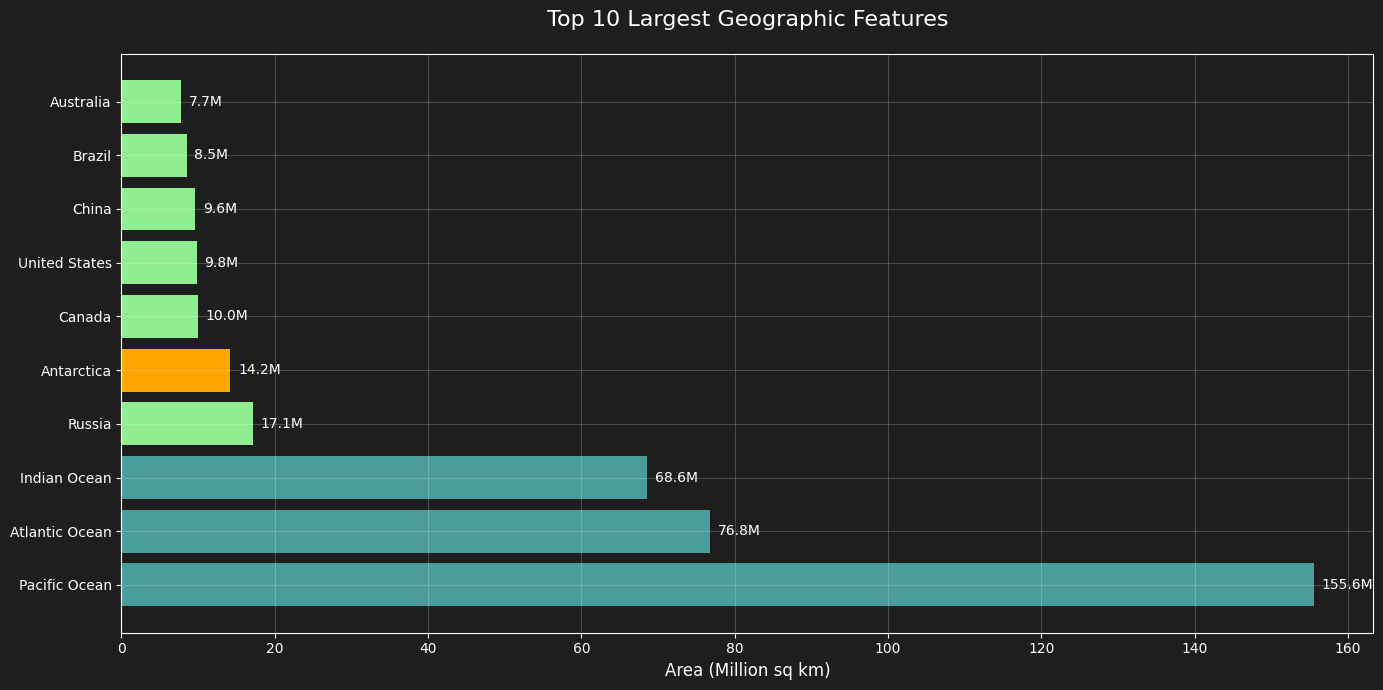

In [10]:
# Largest features data
largest_features = pd.DataFrame({
    'Name': ['Pacific Ocean', 'Atlantic Ocean', 'Indian Ocean', 'Russia', 'Antarctica', 
             'Canada', 'United States', 'China', 'Brazil', 'Australia'],
    'Area_sq_km': [155557000, 76762000, 68556000, 17098242, 14200000,
                   9984670, 9826675, 9596960, 8515770, 7741220],
    'Type': ['Ocean', 'Ocean', 'Ocean', 'Country', 'Continent', 
             'Country', 'Country', 'Country', 'Country', 'Country']
})

fig, ax = plt.subplots(figsize=(14, 7), facecolor=colors['bg'])
ax.set_facecolor(colors['bg'])

bars = ax.barh(largest_features['Name'], 
               largest_features['Area_sq_km']/1000000,
               color=[colors['teal'] if t == 'Ocean' else colors['orange'] if t == 'Continent' 
                      else colors['green'] for t in largest_features['Type']])

ax.set_xlabel('Area (Million sq km)', fontsize=12)
ax.set_title('Top 10 Largest Geographic Features', fontsize=16, pad=20)
ax.grid(True, alpha=0.2)

# Add value labels
for i, (v, name) in enumerate(zip(largest_features['Area_sq_km']/1000000, largest_features['Name'])):
    ax.text(v + 1, i, f'{v:.1f}M', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Global Climate Extremes
**Data Source:** World Meteorological Records 2024  
**Current as of:** January 2024

The world's most extreme climates, from the driest deserts to the wettest rainforests, and from Arctic cold to desert heat.

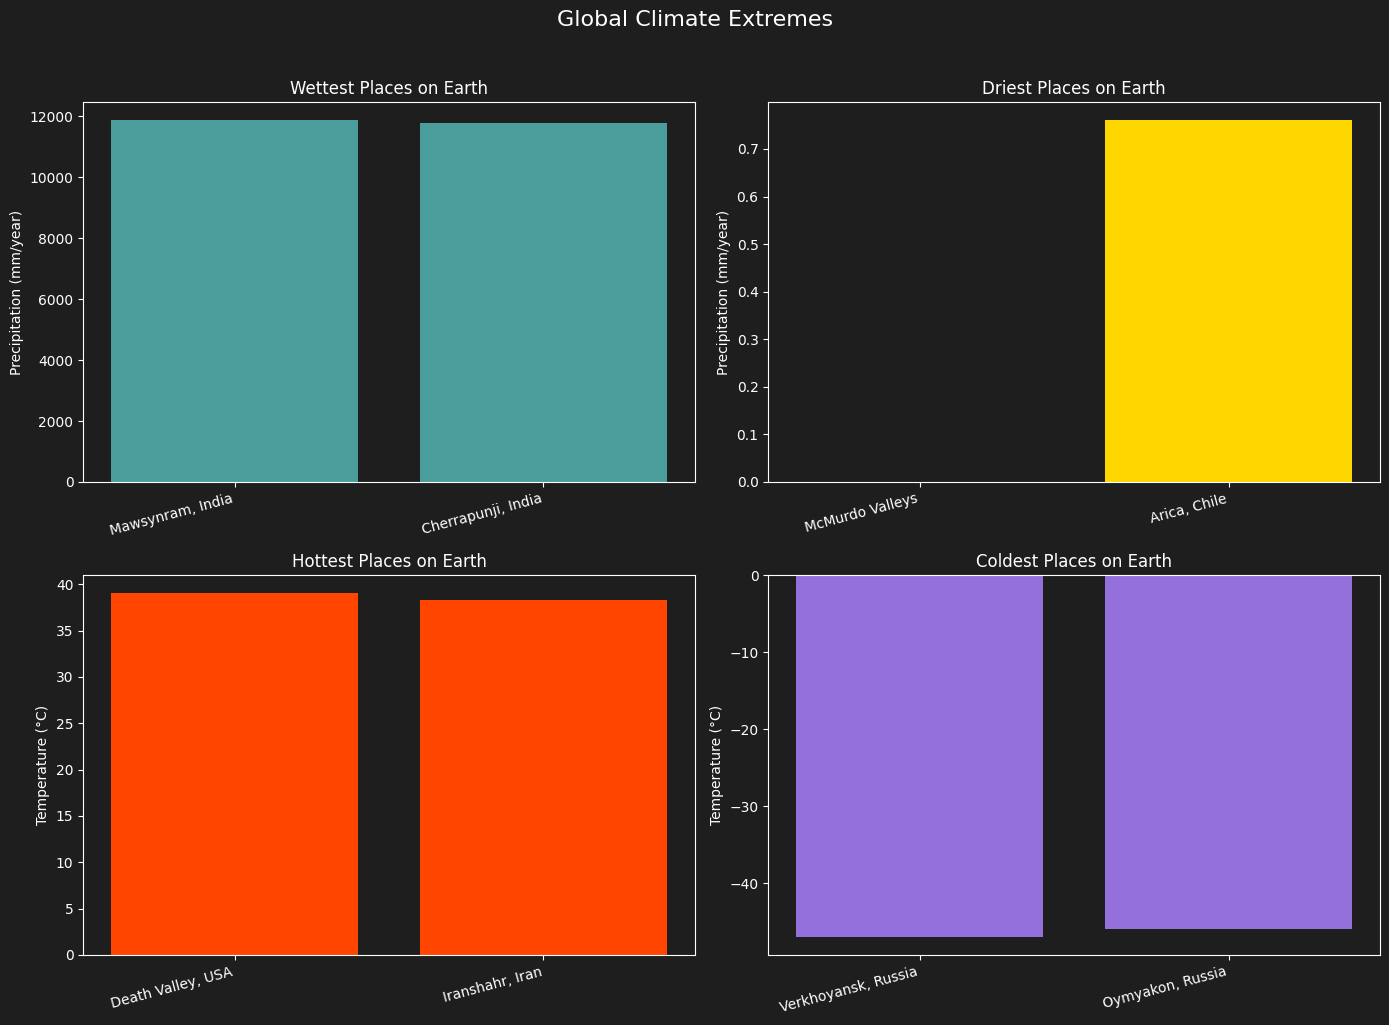

In [11]:
# Climate extremes data
climate_extremes = pd.DataFrame({
    'Location': ['Mawsynram, India', 'Cherrapunji, India', 'Death Valley, USA', 'Iranshahr, Iran',
                 'Verkhoyansk, Russia', 'Oymyakon, Russia', 'McMurdo Valleys', 'Arica, Chile'],
    'Value': [11871, 11777, 39, 38.3, -47, -46, 0, 0.76],
    'Type': ['Wettest', 'Wettest', 'Hottest', 'Hottest', 'Coldest', 'Coldest', 'Driest', 'Driest'],
    'Unit': ['mm/year', 'mm/year', '°C', '°C', '°C', '°C', 'mm/year', 'mm/year']
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor=colors['bg'])
fig.suptitle('Global Climate Extremes', fontsize=16, y=1.02)

# Wettest places
wet_data = climate_extremes[climate_extremes['Type'] == 'Wettest'].head(2)
axes[0,0].bar(range(len(wet_data)), wet_data['Value'], color=colors['teal'])
axes[0,0].set_xticks(range(len(wet_data)))
axes[0,0].set_xticklabels(wet_data['Location'], rotation=15, ha='right')
axes[0,0].set_ylabel('Precipitation (mm/year)')
axes[0,0].set_title('Wettest Places on Earth')
axes[0,0].set_facecolor(colors['bg'])

# Driest places
dry_data = climate_extremes[climate_extremes['Type'] == 'Driest'].head(2)
axes[0,1].bar(range(len(dry_data)), dry_data['Value'], color=colors['yellow'])
axes[0,1].set_xticks(range(len(dry_data)))
axes[0,1].set_xticklabels(dry_data['Location'], rotation=15, ha='right')
axes[0,1].set_ylabel('Precipitation (mm/year)')
axes[0,1].set_title('Driest Places on Earth')
axes[0,1].set_facecolor(colors['bg'])

# Hottest places
hot_data = climate_extremes[climate_extremes['Type'] == 'Hottest'].head(2)
axes[1,0].bar(range(len(hot_data)), hot_data['Value'], color=colors['red'])
axes[1,0].set_xticks(range(len(hot_data)))
axes[1,0].set_xticklabels(hot_data['Location'], rotation=15, ha='right')
axes[1,0].set_ylabel('Temperature (°C)')
axes[1,0].set_title('Hottest Places on Earth')
axes[1,0].set_facecolor(colors['bg'])

# Coldest places
cold_data = climate_extremes[climate_extremes['Type'] == 'Coldest'].head(2)
axes[1,1].bar(range(len(cold_data)), cold_data['Value'], color=colors['purple'])
axes[1,1].set_xticks(range(len(cold_data)))
axes[1,1].set_xticklabels(cold_data['Location'], rotation=15, ha='right')
axes[1,1].set_ylabel('Temperature (°C)')
axes[1,1].set_title('Coldest Places on Earth')
axes[1,1].set_facecolor(colors['bg'])

plt.tight_layout()
plt.show()

## Global Land Use Distribution
**Data Source:** FAO Land Use Statistics 2022  
**Current as of:** 2022 estimates

Distribution of Earth's land surface across agricultural, forest, and other uses.

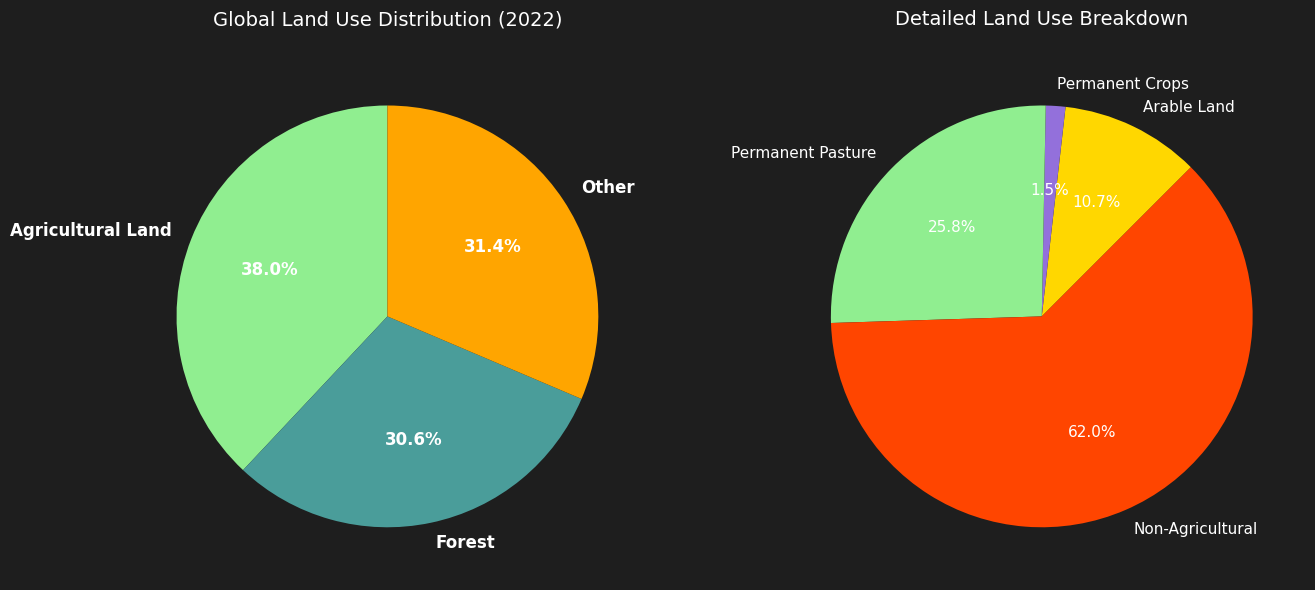

In [12]:
# Land use data
land_use = pd.DataFrame({
    'Category': ['Agricultural Land', 'Forest', 'Other'],
    'Percentage': [38, 30.6, 31.4],
    'Subcategory': [['Arable: 10.7%', 'Crops: 1.5%', 'Pasture: 25.8%'], 
                    ['Forest: 30.6%'], 
                    ['Other: 31.4%']]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor=colors['bg'])

# Main land use pie chart
wedges, texts, autotexts = ax1.pie(land_use['Percentage'],
                                    labels=land_use['Category'],
                                    colors=[colors['green'], colors['teal'], colors['orange']],
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    textprops={'fontsize': 12, 'weight': 'bold'})
ax1.set_title('Global Land Use Distribution (2022)', fontsize=14, pad=20)

# Agricultural land breakdown
ag_breakdown = pd.DataFrame({
    'Type': ['Arable Land', 'Permanent Crops', 'Permanent Pasture', 'Non-Agricultural'],
    'Percentage': [10.7, 1.5, 25.8, 62]
})

wedges2, texts2, autotexts2 = ax2.pie(ag_breakdown['Percentage'],
                                       labels=ag_breakdown['Type'],
                                       colors=[colors['yellow'], colors['purple'], 
                                              colors['green'], colors['red']],
                                       autopct='%1.1f%%',
                                       startangle=45,
                                       textprops={'fontsize': 11})
ax2.set_title('Detailed Land Use Breakdown', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

## Volcanic Activity by Country
**Data Source:** Smithsonian Global Volcanism Program 2024  
**Current as of:** January 2024

Distribution of the world's 1,350+ Holocene volcanoes, with approximately 40-50 erupting at any given time. Holoscene the timeframe to classify volcanoes as active of potential active. Started at the end of the last ice age.

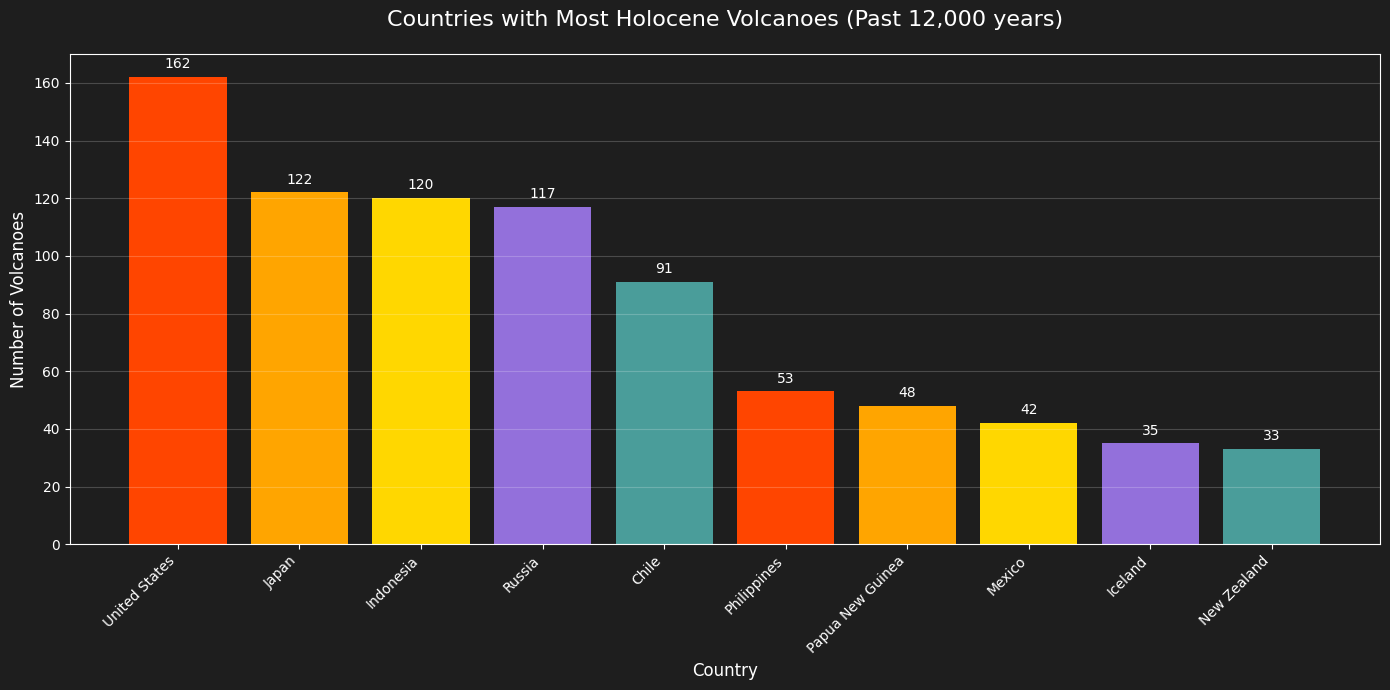

In [13]:
# Volcano data
volcano_data = pd.DataFrame({
    'Country': ['United States', 'Japan', 'Indonesia', 'Russia', 'Chile',
                'Philippines', 'Papua New Guinea', 'Mexico', 'Iceland', 'New Zealand'],
    'Volcanoes': [162, 122, 120, 117, 91, 53, 48, 42, 35, 33]
})

fig, ax = plt.subplots(figsize=(14, 7), facecolor=colors['bg'])
ax.set_facecolor(colors['bg'])

bars = ax.bar(volcano_data['Country'], volcano_data['Volcanoes'],
              color=[colors['red'], colors['orange'], colors['yellow'], 
                     colors['purple'], colors['teal']]*2)

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Volcanoes', fontsize=12)
ax.set_title('Countries with Most Holocene Volcanoes (Past 12,000 years)', fontsize=16, pad=20)
ax.grid(True, alpha=0.2, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Key Findings Summary

**Data Currency:** All statistics current as of January 2024

### Major Insights:

1. **Surface Composition:** Earth remains predominantly aquatic with 70.9% water coverage, of which 97.5% is saltwater

2. **Geographic Scale:** The Pacific Ocean (155.6M sq km) is larger than all land on Earth combined (148.9M sq km)

3. **Climate Extremes:** Precipitation ranges from 0mm/year in Antarctica's McMurdo Valleys to 11,871mm/year in Mawsynram, India

4. **Land Use:** Only 38% of land is used for agriculture, with forests covering 30.6% of terrestrial area

5. **Natural Hazards:** The Ring of Fire contains 75% of active volcanoes and experiences 90% of earthquakes

6. **Temperature Range:** Earth's inhabited areas span from -47°C in Siberia to 39°C in Death Valley